<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%202/Modulo_2_Ejercicio_5_Feature_Engineering_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ejercicio 5: Feature Engineering y Transformación Avanzada de Datos**
## Creación de nuevas variables y reducción de dimensionalidad sin modelos supervisados.



## Introducción

En este ejercicio, exploraremos técnicas avanzadas de **Feature Engineering y Transformación de Datos** para mejorar la calidad y utilidad de la información en un dataset de control de calidad industrial.  
El **Feature Engineering** es un proceso clave en cualquier pipeline de análisis de datos, ya que permite extraer información relevante, reducir la dimensionalidad y mejorar la interpretabilidad de los datos.

### Objetivos del ejercicio:
- Crear nuevas variables a partir de transformaciones matemáticas y categóricas.
- Generar agregaciones sobre datos categóricos y temporales (media, suma, conteo por grupo).
- Aplicar técnicas de reducción de dimensionalidad sin modelos supervisados (selección de variables con varianza baja).
- Estandarizar las características del dataset para futuras aplicaciones.
- Comparar la distribución de los datos antes y después de la transformación.

### Conceptos clave:
- Feature engineering sin modelos de Machine Learning - llegaremos más adelante.
- Agregaciones de datos  
- Reducción de dimensionalidad con técnicas estadísticas  


In [1]:

# Celda 1: Importación de librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

# Configuración de estilos para visualización
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Librerías importadas correctamente.")


Librerías importadas correctamente.



## Descripción del Dataset

Para este ejercicio, utilizaremos el dataset **"Control de calidad en empaques de alimentos"**, alojado en GitHub.  
Este dataset contiene información sobre la calidad de empaques utilizados en la industria alimentaria.

### **Fuente del dataset:**  
- **CSV:** [Control de calidad en empaques de alimentos](https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_empaques.csv)

### **Estructura del dataset:**
| Columna               | Descripción |
|-----------------------|-------------|
| ID_envase            | Identificador único del envase |
| Peso_envase          | Peso del envase en gramos |
| Espesor_material     | Espesor del material en mm |
| Dureza_superficie    | Dureza de la superficie en N/mm² |
| Temperatura_sellado  | Temperatura de sellado en °C |
| Tiempo_prensado      | Tiempo de prensado en segundos |
| Proveedor_material   | Nombre del proveedor (categórico) |
| Tipo_envase          | Tipo de envase (categórico) |
| Color_material       | Color del material (categórico) |
| Defecto_detectado    | Tipo de defecto presente (multiclase) |


In [2]:

# Celda 2: Cargar el dataset desde GitHub

url_csv = "https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_empaques.csv"
df = pd.read_csv(url_csv)

# Mostrar las primeras filas del dataset
df.head()


,ID_envase,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado,Proveedor_material,Tipo_envase,Color_material,Defecto_detectado
0,1,52.483571,0.251530,131.236814,166.001783,8.035426,Proveedor_7,Envase_4,Azul,Rasgado
1,2,49.308678,0.142232,98.115434,185.478228,4.851902,Proveedor_4,Envase_1,Transparente,Rasgado
2,3,53.238443,0.228772,141.912131,178.792377,4.524469,Proveedor_6,Envase_1,Azul,Rasgado
3,4,57.615149,0.169038,72.227237,177.167362,5.515039,Proveedor_4,Envase_2,Blanco,Doble capa
4,5,48.829233,0.183630,93.146984,187.675692,4.936259,Proveedor_9,Envase_4,Azul,Sin defecto


In [4]:

# Celda 3: Creación de nuevas variables

# Crear una variable de relación entre peso y espesor
df["Densidad_material"] = df["Peso_envase"] / df["Espesor_material"]

# Crear una variable de eficiencia del proceso (temperatura por tiempo de moldeo)
df["Eficiencia_proceso"] = df["Temperatura_sellado"] / df["Tiempo_prensado"]

print("Nuevas variables creadas correctamente.")
df.head()


Nuevas variables creadas correctamente.


,ID_envase,Peso_envase,Espesor_material,Dureza_superficie,Temperatura_sellado,Tiempo_prensado,Proveedor_material,Tipo_envase,Color_material,Defecto_detectado,Densidad_material,Eficiencia_proceso
0,1,52.483571,0.251530,131.236814,166.001783,8.035426,Proveedor_7,Envase_4,Azul,Rasgado,208.657525,20.658741
1,2,49.308678,0.142232,98.115434,185.478228,4.851902,Proveedor_4,Envase_1,Transparente,Rasgado,346.677174,38.227944
2,3,53.238443,0.228772,141.912131,178.792377,4.524469,Proveedor_6,Envase_1,Azul,Rasgado,232.714123,39.516765
3,4,57.615149,0.169038,72.227237,177.167362,5.515039,Proveedor_4,Envase_2,Blanco,Doble capa,340.841249,32.124407
4,5,48.829233,0.183630,93.146984,187.675692,4.936259,Proveedor_9,Envase_4,Azul,Sin defecto,265.911182,38.019823


In [5]:

# Celda 4: Generación de agregaciones sobre datos categóricos

# Calcular la media de dureza por cada proveedor de material
df_agg = df.groupby("Proveedor_material")["Dureza_superficie"].agg(["mean", "std", "count"]).reset_index()

print("Agregaciones calculadas correctamente.")
df_agg.head()


Agregaciones calculadas correctamente.


,Proveedor_material,mean,std,count
0,Proveedor_1,103.828403,30.732444,10098
1,Proveedor_10,103.503462,30.415338,9927
2,Proveedor_2,103.540978,31.101035,10056
3,Proveedor_3,104.196530,31.282323,10000
4,Proveedor_4,103.436800,29.459330,9930


In [6]:

# Celda 5: Aplicación de reducción de dimensionalidad con varianza baja

# Aplicar MinMaxScaler para normalizar los datos antes de la reducción
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Aplicar selección de características con umbral de varianza baja
selector = VarianceThreshold(threshold=0.01)
df_reduced = selector.fit_transform(df_scaled)

print(f"Dimensión original: {df_scaled.shape[1]} variables")
print(f"Dimensión después de la reducción: {df_reduced.shape[1]} variables")


Dimensión original: 8 variables
Dimensión después de la reducción: 4 variables


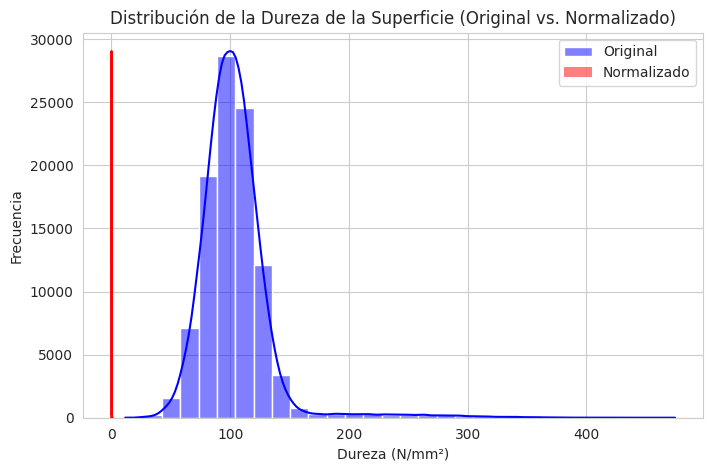

In [7]:

# Celda 6: Comparación de la distribución de datos antes y después de la transformación

# Histograma de la variable Dureza_superficie antes y después de la normalización
plt.figure(figsize=(8,5))
sns.histplot(df["Dureza_superficie"], bins=30, kde=True, label="Original", color="blue")
sns.histplot(df_scaled[:, df.columns.get_loc("Dureza_superficie")], bins=30, kde=True, label="Normalizado", color="red")
plt.title("Distribución de la Dureza de la Superficie (Original vs. Normalizado)")
plt.xlabel("Dureza (N/mm²)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()



## Conclusiones

En este ejercicio hemos aplicado técnicas avanzadas de **Feature Engineering y Transformación de Datos** para mejorar la calidad del dataset de control de calidad en envases de plástico.

### Puntos clave:
- Se crearon **nuevas variables** basadas en transformaciones matemáticas para mejorar la representación de los datos.
- Se generaron **agregaciones** sobre datos categóricos para analizar tendencias en proveedores de material.
- Se aplicó **reducción de dimensionalidad** utilizando la varianza baja como criterio de selección.
- Se comparó la **distribución de variables** antes y después de la normalización para evaluar los efectos de la transformación.

### Posibles mejoras:
- Explorar más transformaciones basadas en funciones logarítmicas y exponenciales.
- Aplicar técnicas avanzadas de reducción de dimensionalidad como PCA.
- Incorporar información temporal en futuras transformaciones de datos.
